In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fraud_dataset.csv')

In [3]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


I can see that there is a column called fraud. This column is my dependent variable. The value 0 means no fraud and 1 means fraud.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.shape

(1000000, 8)

In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## 1) Check if the database contains missing values

No missing values. Therefore, the outliers are present in the dataset, but will not be treated, because of the high values given as bid by the sellers themselves probably fit the condition of outliers and is indispensable in the fraud analysis.

In [7]:
#Checking mising Values
df.isna().any()

distance_from_home                False
distance_from_last_transaction    False
ratio_to_median_purchase_price    False
repeat_retailer                   False
used_chip                         False
used_pin_number                   False
online_order                      False
fraud                             False
dtype: bool

In [8]:
#Checking duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 8)


## 2) Check which independent columns contribute most to fraud detection

Heat Maps are a type of plot which is allow us to find the dependent variables or the relationship between the features. In the heat map of the dataset, we can see that the fraud has a moderate and positive correlation with and ratio_to_median_purchase_price; moderate and positive correlation with online_order and distance_from_home; Essas sao as que mais se relacionam com a tomada de decisao se é ou nao fraude.

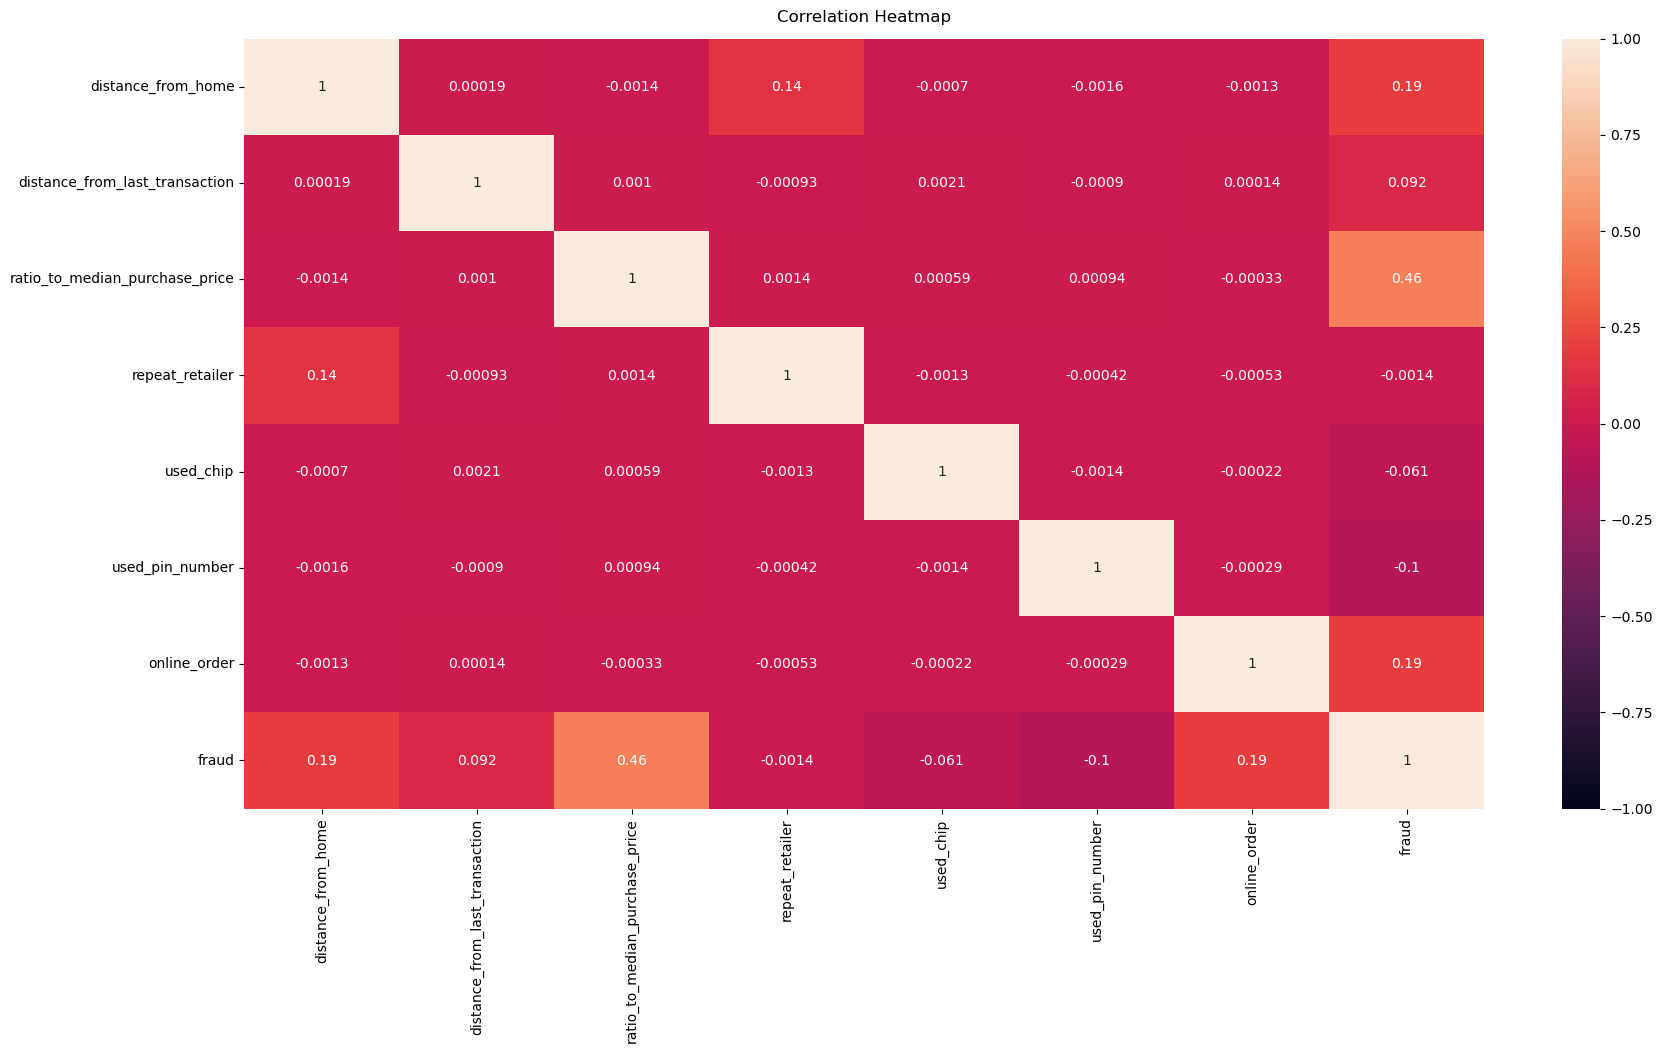

In [9]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 10))

# Set the range of values to be displayed on the colormap from -1 to 1
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Analyzing the Gaussian behavior 

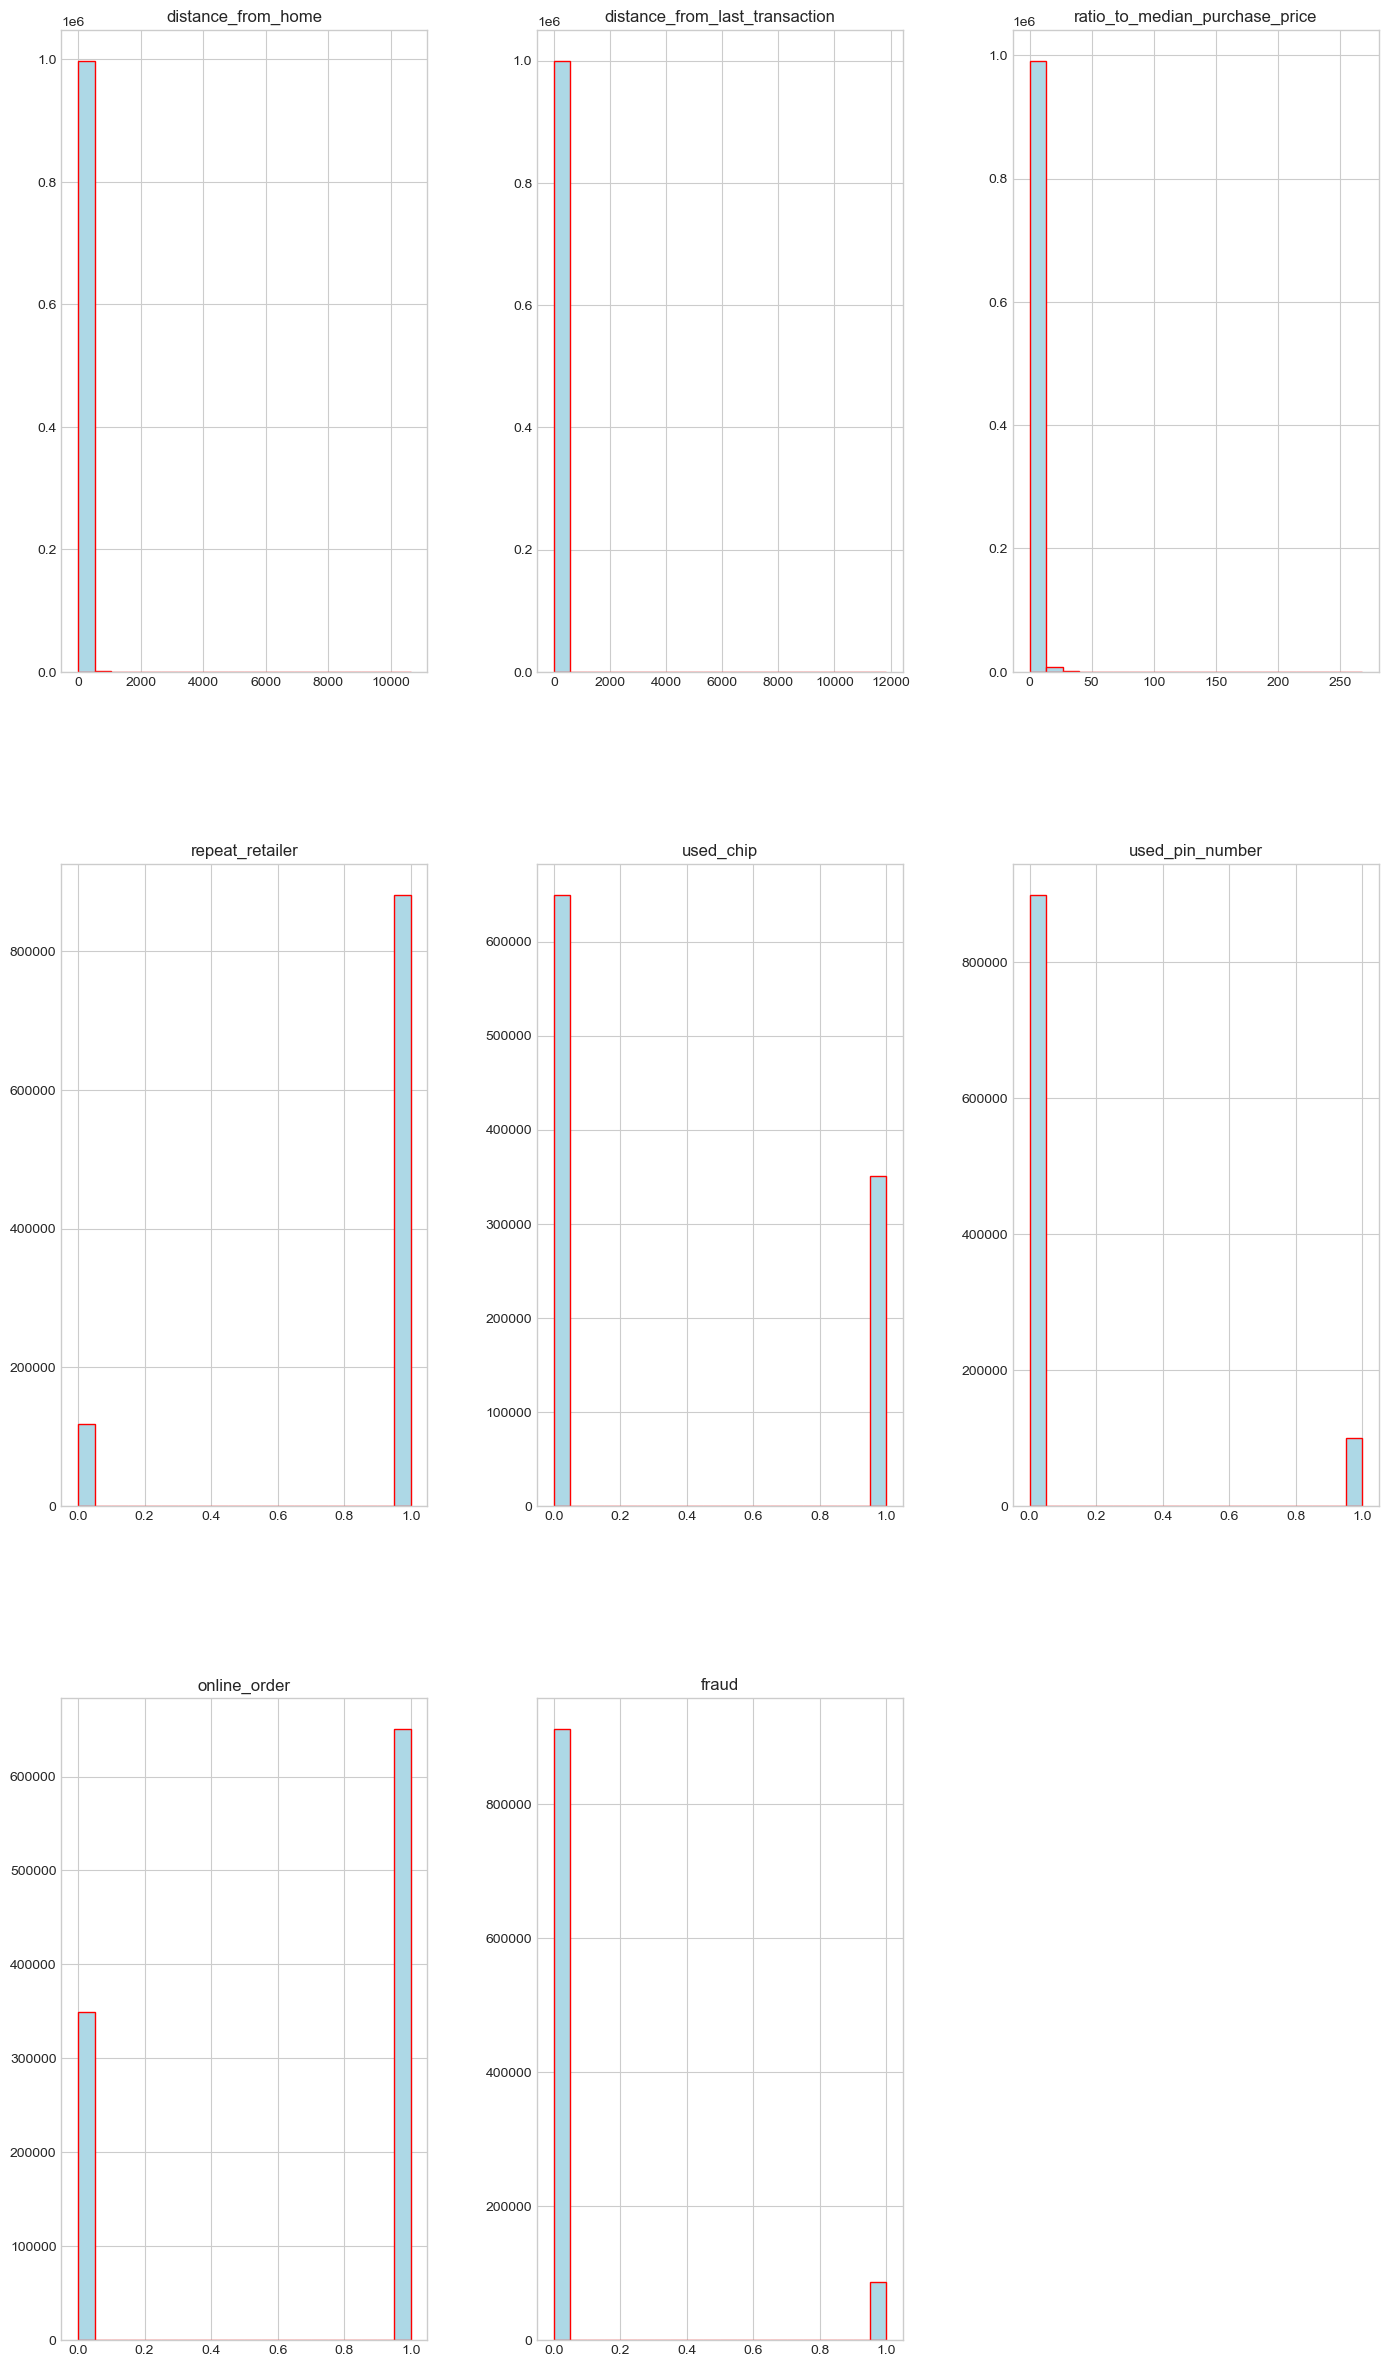

In [10]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(17,30), color='lightblue', edgecolor = 'red')
plt.show()

## Checking columns with outliers

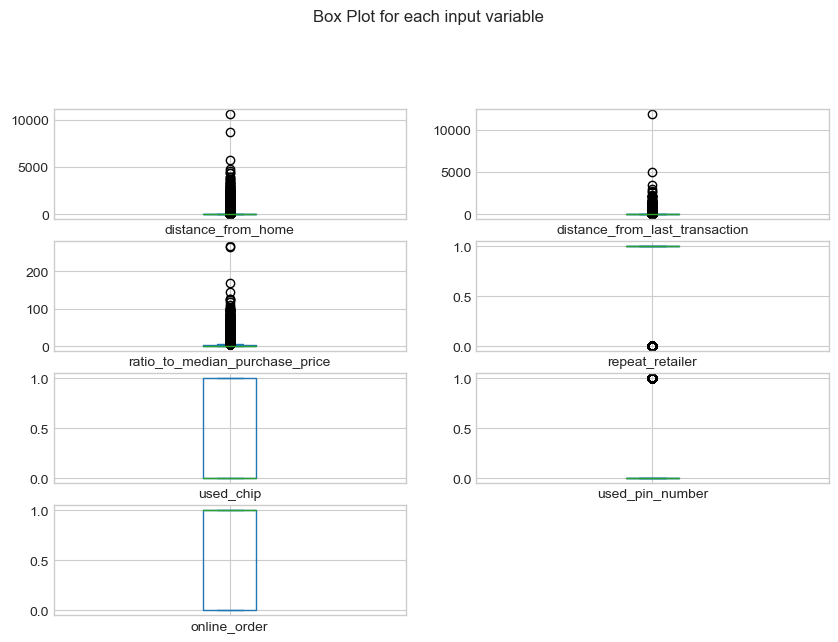

In [11]:
df.drop('fraud', axis=1).plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
plt.show()

## Data preparation

Database Division:
Split the database using the hold out technique, keeping an appropriate proportion to guarantee data representativeness.

In [12]:
from sklearn.model_selection import train_test_split
x = df.drop(columns='fraud', axis = 1) 
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

## Please Rescale the data

The primary reason we split before scaling is to prevent data leakage. Data leakage happens when information from outside the training dataset is used to create the model. Apply the scaling transformation to the training data.

In [13]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

minmax.fit(X_train)
X_train_minmax = minmax.transform(X_train)
X_test_minmax = minmax.transform(X_test)

## If the database has some type of imbalance, apply an oversampling technique to balance the classes

<AxesSubplot:xlabel='fraud', ylabel='count'>

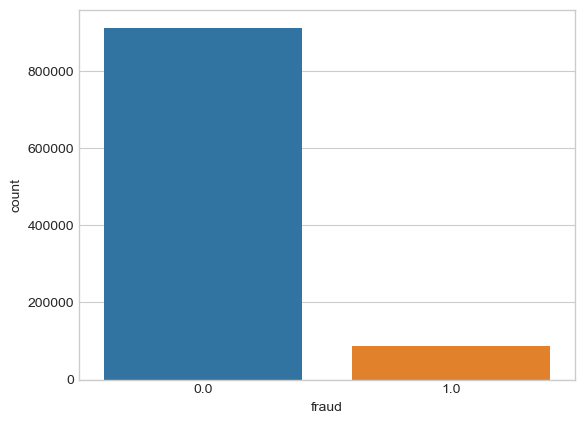

In [14]:
# Let's check data distribution of class type.
sns.countplot(x='fraud',data=df)

In the dataset being analyzed is clearly imbalance. We can see this in the graph below which shows the ratio of class as 1 and 0. This is because most of the bets are from real buyers, and only a small part of buyers who are trying to commit fraud. Class imbalance consists in a disproportion of the number of examples of the different classes in the problem. This issue is known to hinder the performance of classifiers due to their accuracy. The dataset can be balanced in two ways: undersampling, that consists of reducing the data by eliminating examples belonging to the majority class with the objective of equalizing the number of examples of each class; and oversampling, that aims to replicate or generate new positive examples in order to gain importance. Oversampling generates new examples without worrying about the neighboring points of the majority class, thus increasing the transposition between classes, which can end up introducing noise into the data, however, it solves the problem of unbalanced data. Undersampling eliminates examples that are more likely to be causing data noise, but does not solve the problem of imbalance the way we need to. For that reason I decided to apply the combination of oversampling using SMOTE.

In [15]:
# Clearly, we have data imbalance here. 
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

C:\Users\micha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='count'>

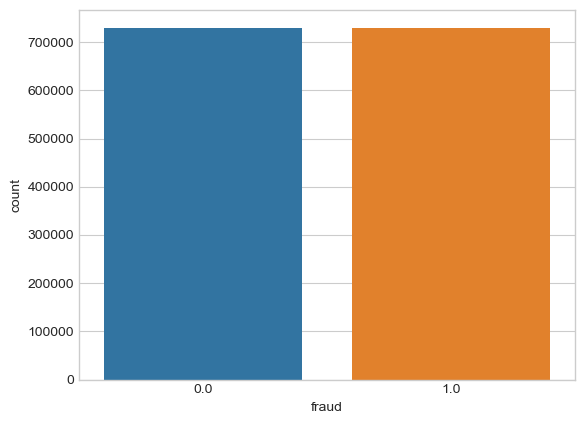

In [16]:
#Applying oversampling SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_SMOTE, Y_train_SMOTE = smote.fit_resample(X_train_minmax, y_train)

sns.countplot(Y_train_SMOTE)

# Modeling:
#### Implement the Logistic Regression algorithm with L2 regularization.

In [17]:
#Applying Logistic Regression with L2 

# L2 is the default, however, because the questions specify it, I'm adding

from sklearn.linear_model import LogisticRegression     

logreg = LogisticRegression(penalty = 'l2')
logreg.fit(X_train_SMOTE, Y_train_SMOTE)
y_pred_lda = logreg.predict(X_test_minmax)

In [18]:
print('Training score: {:.3f}'.format(logreg.score(X_train_SMOTE,Y_train_SMOTE)))
print('Testing score: {:.3f}'.format(logreg.score(X_test_minmax,y_test)))

Training score: 0.927
Testing score: 0.926


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182557
         1.0       0.55      0.93      0.69     17443

    accuracy                           0.93    200000
   macro avg       0.77      0.93      0.82    200000
weighted avg       0.95      0.93      0.93    200000

AxesSubplot(0.125,0.11;0.775x0.77)


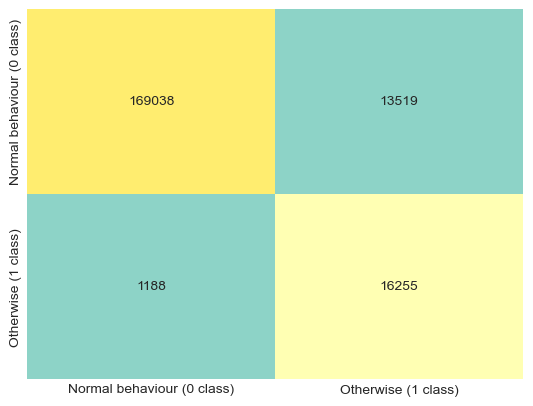

In [19]:
# Confusion Matrix 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

print(classification_report(y_test, y_pred_lda))
print(sns.heatmap(confusion_matrix(y_test, y_pred_lda), annot=True, fmt='.8g',                
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Set3'))

169038 0 class values as a true positive values, in our dataset thats the honest biddings. 13519 were predicted as False Positive, predict as a honest bid but can be a fraud. Over 16255 1 class values, predict as a fraud and is a fraud. 1188 was predicted as False Negative the model predict as a fraud and can be not a fraud. Testing score: 0.926 and Training score: 0.927. Satisfactory values to predict the results. With this amount it is satisfactory to predict the results for next bets and frauds of the online shopping site.

## Logistic Regression - Hyperparameters and Cross Validation

#### Use the k-fold cross-validation technique (with 5 folds) to evaluate the model's performance.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


log_reg = LogisticRegression(penalty = 'l2')

cv = KFold(n_splits=5, random_state=42, shuffle=True)

score = cross_val_score(log_reg, X_train_SMOTE, Y_train_SMOTE, cv=cv, scoring = 'roc_auc')
score.mean()

0.9739565441054039

In [21]:
log_reg.fit(X_train_SMOTE, Y_train_SMOTE)
y_pred_reg = log_reg.predict(X_test_minmax)

In [22]:
print('Training score: {:.3f}'.format(log_reg.score(X_train_SMOTE,Y_train_SMOTE)))
print('Testing score: {:.3f}'.format(log_reg.score(X_test_minmax,y_test)))

Training score: 0.927
Testing score: 0.926


#### Evaluate the model using metrics such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC).

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182557
         1.0       0.55      0.93      0.69     17443

    accuracy                           0.93    200000
   macro avg       0.77      0.93      0.82    200000
weighted avg       0.95      0.93      0.93    200000

AxesSubplot(0.125,0.11;0.775x0.77)
0.9289194332144407


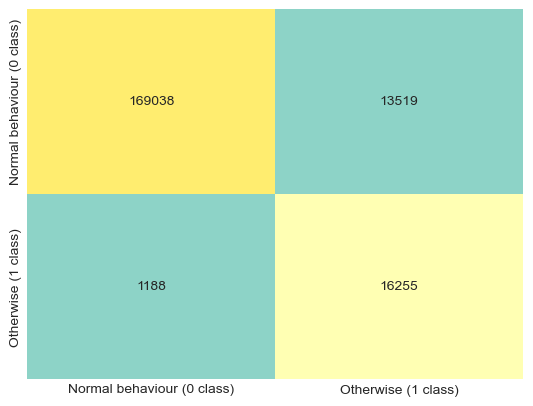

In [23]:
# Confusion Matrix and roc curve

from sklearn.metrics import roc_auc_score

cuv_roc = roc_auc_score(y_test, y_pred_reg)

print(classification_report(y_test, y_pred_reg))
print(sns.heatmap(confusion_matrix(y_test, y_pred_reg), annot=True, fmt='.8g',                
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Set3'))
print (cuv_roc.mean())

#### Trying to improve the model

In [24]:
#Trying to find the best parameters to run the model 

log_clf = LogisticRegression(random_state = 42)
param_grid = {'penalty' : ['l2','l1'],  'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = True, n_jobs = -1)
best_clf = CV_log_clf.fit(X_train_SMOTE,Y_train_SMOTE)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)
print (f'Accuracy train - : {best_clf.score(X_train_SMOTE,Y_train_SMOTE):.3f}')
print (f'Accuracy test - : {best_clf.score(X_test_minmax, y_test):.3f}')


Fitting 5 folds for each of 14 candidates, totalling 70 fits


C:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

The best parameters for using this model is {'C': 1000, 'penalty': 'l2'}
Accuracy train - : 0.941
Accuracy test - : 0.935


In [25]:
#Log with best hyperparameters
CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = 42)

CV_log_clf.fit(X_train_SMOTE,Y_train_SMOTE)
y_pred = CV_log_clf.predict(X_test_minmax)
y_score = CV_log_clf.decision_function(X_test_minmax)

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

AxesSubplot(0.125,0.11;0.775x0.77)
0.942382826547313


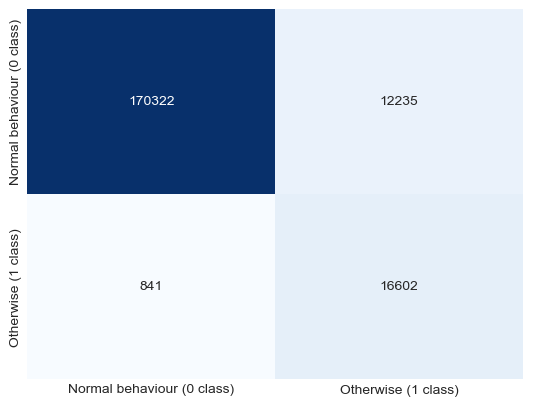

In [26]:
# Model evaluation
cuv_roc_BP = roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.8g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))
print(cuv_roc_BP.mean())

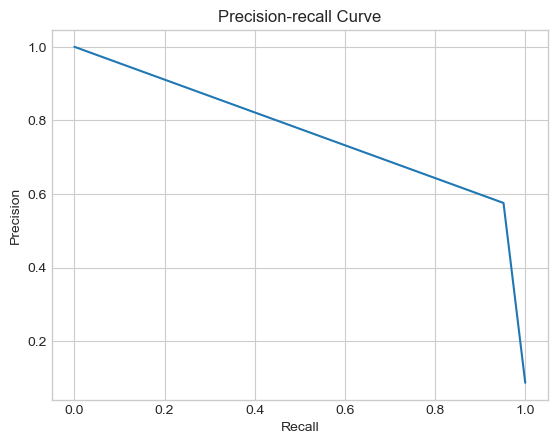

In [27]:
#Check recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.title("Precision-recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## Conclusion

The roc curve, recall and accuracy are showing good results, however the accuracy in defining fraud is only 0.58. This is very low, concluding that this model is not ready to run yet. As an attempt to improve, I would try to apply PCA and LDA techniques before the Logistic Regression model. If it continued, perhaps the decision tree would be a better solution.